In [14]:
import re
import numpy as np
import pandas as pd
import sounddevice as sd
from matplotlib import pyplot as plt
from datetime import datetime
from scipy.io.wavfile import write

# Plotting a single file

In [15]:
filename='file'

In [16]:
file = open(filename+".txt", "r")
string=file.read()
string=string.replace("\x00","")
string

'[2022-01-11 01:30:01.972045](-14260)(-15748)(-15916)(-15740)(-15820)(-15364)(-14972)(-14908)(-14740)(-14332)(-15740)(-16220)(-16548)(-16540)(-15732)(-14508)(-14108)(-13884)(-14628)(-15588)(-16588)(-16148)(-16060)(-16164)(-16268)(-15916)(-15196)(-14588)(-15180)(-15676)(-16452)(-16532)(-16412)(-15932)(-15780)(-15140)(-15652)(-15700)(-16732)(-16820)(-17308)(-16692)(-15708)(-15540)(-15220)(-14716)(-15100)(-15612)(-16396)(-16876)(-16868)(-16684)(-16604)(-16868)(-16932)(-16828)(-16612)(-17380)(-16636)(-16444)(-16524)(-16900)(-16788)(-17260)(-17356)(-16572)(-15948)(-16532)(-16956)(-17436)(-17492)(-16772)(-16700)(-15772)(-15260)(-14868)(-15732)(-16244)(-16340)(-16636)(-16188)(-16020)(-15764)(-15900)(-15876)(-16292)(-16164)(-16412)(-15540)(-15580)(-15788)(-15772)(-15476)(-15316)(-15372)(-15524)(-15820)(-16316)(-16244)(-16596)(-15844)(-15948)(-15308)(-15164)(-14636)(-14132)(-14796)(-15364)(-15260)(-15628)(-15980)(-15260)(-15012)(-15012)(-15204)(-15724)(-15724)(-15604)(-15588)(-15468)(-14948)(-1

In [17]:
pattern = "\[(.*?)\]"
timestamps = re.findall(pattern, string)
print("First timestamp: "+ str(timestamps[0]))
print("Last timestamp:  "+ str(timestamps[-1]))
date_format = '%Y-%m-%d %H:%M:%S.%f' 
# Change  fmt according to the value you get because the timestamp is generated by the server and may vary for every server
totaltime=datetime.strptime(timestamps[-1], date_format)-datetime.strptime(timestamps[0], date_format)
timeinsec=totaltime.total_seconds()
print("Total recording time for this file: "+ str(timeinsec)+' secs')

First timestamp: 2022-01-11 01:30:01.972045
Last timestamp:  2022-01-11 01:30:17.634999
Total recording time for this file: 15.662954 secs


Total Readings: 267
Sample rate: 17.046592871306398
Sample rate in min: 1022.7955722783839


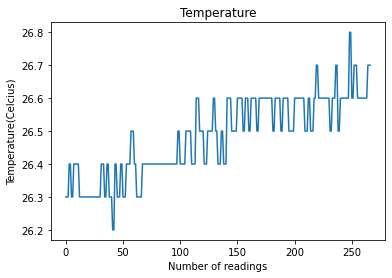

In [18]:
pattern = "\|(.*?)\|"
temperature = re.findall(pattern, string)
# print(temperature)
temperature_numpy=np.array(temperature)
temperature_numpy = temperature_numpy.astype(float)
print("Total Readings: "+str(len(temperature_numpy)))
print("Sample rate: "+str(len(temperature_numpy)/timeinsec))
print("Sample rate in min: "+str((len(temperature_numpy)/timeinsec)*60))

plt.ylabel('Temperature(Celcius)')
plt.xlabel('Number of readings')
plt.title('Temperature')
plt.plot(temperature_numpy)


Total Readings: 267
Sample rate: 17.046592871306398
Sample rate in min: 1022.7955722783839


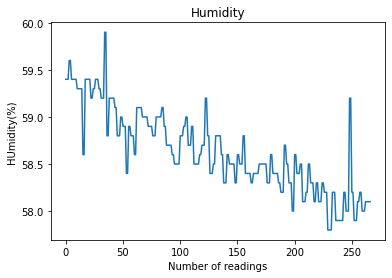

In [19]:
pattern = "\!(.*?)\!"
humidity = re.findall(pattern, string)
# print(humidity)
humidity_numpy=np.array(humidity)
humidity_numpy = humidity_numpy.astype(float)
print("Total Readings: "+str(len(humidity_numpy)))
print("Sample rate: "+str(len(humidity_numpy)/timeinsec))
print("Sample rate in min: "+str((len(humidity_numpy)/timeinsec)*60))

plt.ylabel('HUmidity(%)')
plt.xlabel('Number of readings')
plt.title('Humidity')
plt.plot(humidity_numpy)

Total Readings: 267


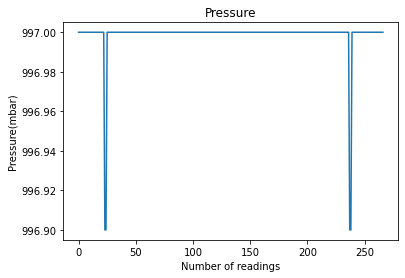

In [20]:
pattern = "\$(.*?)\$"
pressure = re.findall(pattern, string)
# print(pressure)
pressure_numpy=np.array(pressure)
pressure_numpy = pressure_numpy.astype(float)
print("Total Readings: "+str(len(pressure_numpy)))
plt.ylabel('Pressure(mbar)')
plt.xlabel('Number of readings')
plt.title('Pressure')
plt.plot(pressure_numpy)

Total Readings for each: 267


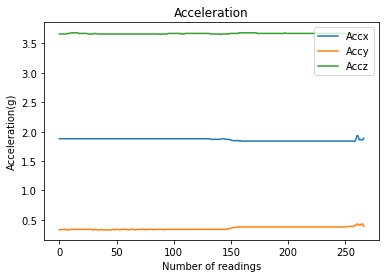

In [21]:
pattern = "\^(.*?)\^"
acceleration = re.findall(pattern, string)
# print(acceleration)
noaccx=[]
accz=[]
accx=[i.split("x", 1)[0] for i in acceleration]
noaccx.append([i.split("x", 1)[1] for i in acceleration])
accy=[i.split("x", 1)[0] for i in noaccx[0]]
accz=[i.split("x", 1)[1] for i in noaccx[0]]

accx_numpy=np.array(accx)
accx_numpy = accx_numpy.astype(float)
accy_numpy=np.array(accy)
accy_numpy = accy_numpy.astype(float)
accz_numpy=np.array(accz)
accz_numpy = accz_numpy.astype(float)

print("Total Readings for each: "+str(len(accz_numpy)))
plt.plot(accx_numpy,label='Accx')
plt.plot(accy_numpy,label='Accy')
plt.plot(accz_numpy,label='Accz')
plt.ylabel('Acceleration(g)')
plt.xlabel('Number of readings')
plt.title('Acceleration')
plt.legend()
plt.show()

Total Readings for each: 267


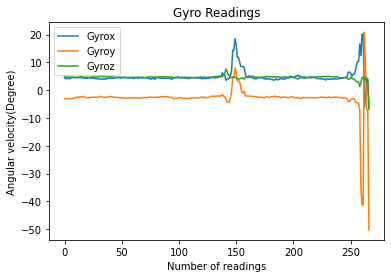

In [22]:
pattern = "\@(.*?)\@"
gyroscope = re.findall(pattern, string)
# print(gyroscope)
nogyrox=[]
gyroz=[]
gyrox=[i.split("x", 1)[0] for i in gyroscope]
nogyrox.append([i.split("x", 1)[1] for i in gyroscope])
gyroy=[i.split("x", 1)[0] for i in nogyrox[0]]
gyroz=[i.split("x", 1)[1] for i in nogyrox[0]]

gyrox_numpy=np.array(gyrox)
gyrox_numpy = gyrox_numpy.astype(float)
gyroy_numpy=np.array(gyroy)
gyroy_numpy = gyroy_numpy.astype(float)
gyroz_numpy=np.array(gyroz)
gyroz_numpy = gyroz_numpy.astype(float)

print("Total Readings for each: "+str(len(gyroz_numpy)))
plt.plot(gyrox_numpy,label='Gyrox')
plt.plot(gyroy_numpy,label='Gyroy')
plt.plot(gyroz_numpy,label='Gyroz')
plt.ylabel('Angular velocity(Degree)')
plt.xlabel('Number of readings')
plt.title('Gyro Readings')
plt.legend()
plt.show()

Total Readings for each axis: 267


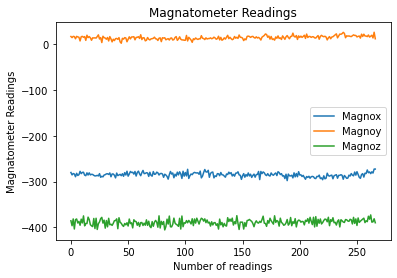

In [23]:
pattern = "\#(.*?)\#"
magno = re.findall(pattern, string)
# print(magno)
nomagnox=[]
magnoz=[]
magnox=[i.split("x", 1)[0] for i in magno]
nomagnox.append([i.split("x", 1)[1] for i in magno])
magnoy=[i.split("x", 1)[0] for i in nomagnox[0]]
magnoz=[i.split("x", 1)[1] for i in nomagnox[0]]

magnox_numpy=np.array(magnox)
magnox_numpy = magnox_numpy.astype(float)
magnoy_numpy=np.array(magnoy)
magnoy_numpy = magnoy_numpy.astype(float)
magnoz_numpy=np.array(magnoz)
magnoz_numpy = magnoz_numpy.astype(float)

print("Total Readings for each axis: "+str(len(magnoz_numpy)))
plt.plot(magnox_numpy,label='Magnox')
plt.plot(magnoy_numpy,label='Magnoy')
plt.plot(magnoz_numpy,label='Magnoz')
plt.ylabel('Magnatometer Readings')
plt.xlabel('Number of readings')
plt.title('Magnatometer Readings')
plt.legend()
plt.show()

The total microphone readings are: 127744
Total Microphone readings plotted: 127744
Sample Rate of microphone is: 8155.805092704735


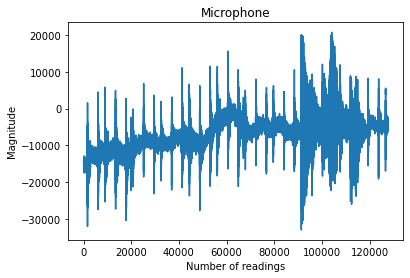

In [24]:
pattern = "\((.*?)\)"
Microphone_temp = re.findall(pattern, string)
Microphone_temp=[re.sub('\[(.*?)\]', '', x) for x in Microphone_temp]
Microphone=[x for x in Microphone_temp if len(x)<12]
Microphone_numpy=np.array(Microphone)
Microphone_numpy = Microphone_numpy.astype(int)
Sr=len(Microphone_temp)/timeinsec
print("The total microphone readings are: "+str(len(Microphone_temp)))
print("Total Microphone readings plotted: "+str(len(Microphone_numpy)))
print("Sample Rate of microphone is: "+ str(Sr))

plt.ylabel('Magnitude')
plt.xlabel('Number of readings')
plt.title('Microphone')
plt.plot(Microphone_numpy)

Total Readings: 267


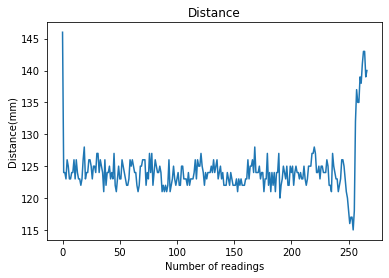

In [25]:
pattern = "\*(.*?)\*"
distance = re.findall(pattern, string)
# print(distance)
distance_numpy=np.array(distance)
distance_numpy = distance_numpy.astype(float)
print("Total Readings: "+str(len(distance_numpy)))
plt.ylabel('Distance(mm)')
plt.xlabel('Number of readings')
plt.title('Distance')
plt.plot(distance_numpy)

# Play  and Save sound as Wav (If required)

In [26]:
print("The sampling rate is: "+ str(int(Sr)))
scaled = np.int16(Microphone_numpy/np.max(np.abs(Microphone_numpy)) * 32767)
write(filename+'.wav', int(Sr), scaled)

The sampling rate is: 8155


In [27]:
sd.play(scaled, Sr)

###### Export all sensor data to CSV (If required)

In [28]:
pattern = "\[(.*?)\)"
related_timestamps = re.findall(pattern, string)
related_timestamps2=[x for x in related_timestamps if len(x)>100]
related_timestamp=[i.split("]", 1)[0] for i in related_timestamps2]

In [29]:
All_data=pd.DataFrame(related_timestamp,columns=['Timestamps'])
All_data['Temperature'] = temperature_numpy
All_data['Humidity'] = humidity_numpy
All_data['Pressure'] = pressure_numpy
All_data['Distance'] = distance_numpy
All_data['Accx'] = accx_numpy
All_data['Accy'] = accy_numpy
All_data['Accz'] = accz_numpy
All_data['Gyrox'] = gyrox_numpy
All_data['Gyroy'] = gyroy_numpy
All_data['Gyroz'] = gyroz_numpy
All_data['Magnox'] = magnox_numpy
All_data['Magnoy'] = magnoy_numpy
All_data['Magnoz'] = magnoz_numpy

In [30]:
All_data.to_csv(filename+'_Allsensors.csv',encoding='utf-8')

### Export the sound data as csv file (If required) 

In [31]:
sound_df=pd.DataFrame(Microphone_numpy,columns=['Microphone'])
sound_df.to_csv(filename+'_Microphone.csv',encoding='utf-8')